In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("taxi_trip_pricing.csv")

In [3]:
df.columns

Index(['Trip_Distance_km', 'Time_of_Day', 'Day_of_Week', 'Passenger_Count',
       'Traffic_Conditions', 'Weather', 'Base_Fare', 'Per_Km_Rate',
       'Per_Minute_Rate', 'Trip_Duration_Minutes', 'Trip_Price'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Trip_Distance_km       950 non-null    float64
 1   Time_of_Day            950 non-null    object 
 2   Day_of_Week            950 non-null    object 
 3   Passenger_Count        950 non-null    float64
 4   Traffic_Conditions     950 non-null    object 
 5   Weather                950 non-null    object 
 6   Base_Fare              950 non-null    float64
 7   Per_Km_Rate            950 non-null    float64
 8   Per_Minute_Rate        950 non-null    float64
 9   Trip_Duration_Minutes  950 non-null    float64
 10  Trip_Price             951 non-null    float64
dtypes: float64(7), object(4)
memory usage: 86.1+ KB


In [5]:
df.head()

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
0,19.35,Morning,Weekday,3.0,Low,Clear,3.56,0.80,0.32,53.82,36.2624
1,47.59,Afternoon,Weekday,1.0,High,Clear,NaN,0.62,0.43,40.57,NaN
2,36.87,Evening,Weekend,1.0,High,Clear,2.70,1.21,0.15,37.27,52.9032
3,30.33,Evening,Weekday,4.0,Low,NaN,3.48,0.51,0.15,116.81,36.4698
4,NaN,Evening,Weekday,3.0,High,Clear,2.93,0.63,0.32,22.64,15.6180


In [6]:
df

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
0,19.35,Morning,Weekday,3.0,Low,Clear,3.56,0.80,0.32,53.82,36.2624
1,47.59,Afternoon,Weekday,1.0,High,Clear,NaN,0.62,0.43,40.57,NaN
2,36.87,Evening,Weekend,1.0,High,Clear,2.70,1.21,0.15,37.27,52.9032
3,30.33,Evening,Weekday,4.0,Low,NaN,3.48,0.51,0.15,116.81,36.4698
4,NaN,Evening,Weekday,3.0,High,Clear,2.93,0.63,0.32,22.64,15.6180
...,...,...,...,...,...,...,...,...,...,...,...
995,5.49,Afternoon,Weekend,4.0,Medium,Clear,2.39,0.62,0.49,58.39,34.4049
996,45.95,Night,Weekday,4.0,Medium,Clear,3.12,0.61,NaN,61.96,62.1295
997,7.70,Morning,Weekday,3.0,Low,Rain,2.08,1.78,NaN,54.18,33.1236
998,47.56,Morning,Weekday,1.0,Low,Clear,2.67,0.82,0.17,114.94,61.2090


In [7]:
df.describe()

,Trip_Distance_km,Passenger_Count,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
count,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,951.000000
mean,27.070547,2.476842,3.502989,1.233316,0.292916,62.118116,56.874773
std,19.905300,1.102249,0.870162,0.429816,0.115592,32.154406,40.469791
min,1.230000,1.000000,2.010000,0.500000,0.100000,5.010000,6.126900
25%,12.632500,1.250000,2.730000,0.860000,0.190000,35.882500,33.742650
50%,25.830000,2.000000,3.520000,1.220000,0.290000,61.860000,50.074500
75%,38.405000,3.000000,4.260000,1.610000,0.390000,89.055000,69.099350
max,146.067047,4.000000,5.000000,2.000000,0.500000,119.840000,332.043689


In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
df.isnull().sum()

Trip_Distance_km         50
Time_of_Day              50
Day_of_Week              50
Passenger_Count          50
Traffic_Conditions       50
Weather                  50
Base_Fare                50
Per_Km_Rate              50
Per_Minute_Rate          50
Trip_Duration_Minutes    50
Trip_Price               49
dtype: int64

<Axes: xlabel='Trip_Distance_km', ylabel='Count'>

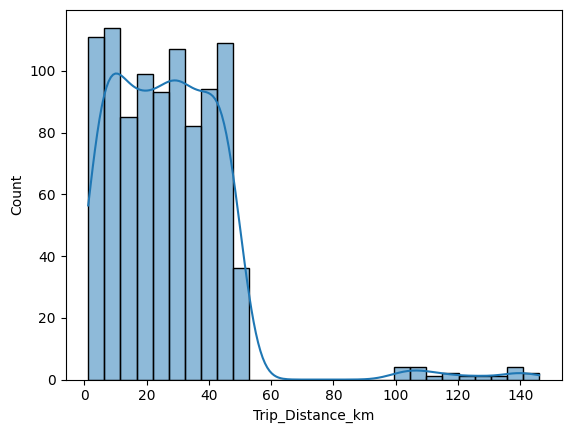

In [10]:
sns.histplot(df["Trip_Distance_km"],kde=True)

<Axes: xlabel='Passenger_Count', ylabel='Count'>

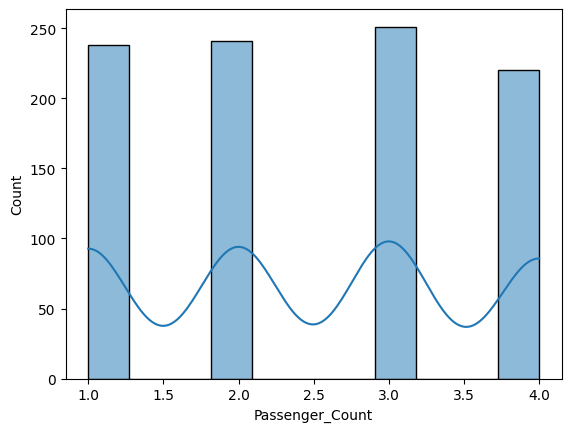

In [11]:
sns.histplot(df["Passenger_Count"],kde=True)

In [12]:
df["Passenger_Count"].fillna(df["Passenger_Count"].mean(),inplace=True)

In [13]:
df["Trip_Price"].fillna(df["Trip_Price"].mean(),inplace=True)

In [14]:
bp_mean=df.loc[df['Passenger_Count']!=0,'Passenger_Count'].mean()
df['Passenger_Count']=df['Passenger_Count'].replace(0,bp_mean)
df['Passenger_Count']=df['Passenger_Count'].round(2)

In [15]:
df["Base_Fare"].fillna(df["Base_Fare"].mean(),inplace=True)

In [16]:
bp_mean=df.loc[df['Base_Fare']!=0,'Base_Fare'].mean()
df['Base_Fare']=df['Base_Fare'].replace(0,bp_mean)
df['Base_Fare']=df['Base_Fare'].round(2)

In [17]:
df["Per_Km_Rate"].fillna(df["Per_Km_Rate"].mean(),inplace=True)

In [18]:
bp_mean=df.loc[df['Per_Km_Rate']!=0,'Per_Km_Rate'].mean()
df['Per_Km_Rate']=df['Per_Km_Rate'].replace(0,bp_mean)
df['Per_Km_Rate']=df['Per_Km_Rate'].round(2)

In [19]:
df["Per_Minute_Rate"].fillna(df["Per_Minute_Rate"].mean(),inplace=True)

In [20]:
bp_mean=df.loc[df['Per_Minute_Rate']!=0,'Per_Minute_Rate'].mean()
df['Per_Minute_Rate']=df['Per_Minute_Rate'].replace(0,bp_mean)
df['Per_Minute_Rate']=df['Per_Minute_Rate'].round(2)

In [21]:
df["Trip_Duration_Minutes"].fillna(df["Trip_Duration_Minutes"].mean(),inplace=True)

In [22]:
bp_mean=df.loc[df['Trip_Duration_Minutes']!=0,'Trip_Duration_Minutes'].mean()
df['Trip_Duration_Minutes']=df['Trip_Duration_Minutes'].replace(0,bp_mean)
df['Trip_Duration_Minutes']=df['Trip_Duration_Minutes'].round(2)

In [23]:
df["Trip_Distance_km"].fillna(df["Trip_Distance_km"].mean(),inplace=True)

In [24]:
bp_mean=df.loc[df['Trip_Distance_km']!=0,'Trip_Distance_km'].mean()
df['Trip_Distance_km']=df['Trip_Distance_km'].replace(0,bp_mean)
df['Trip_Distance_km']=df['Trip_Distance_km'].round(2)

<Axes: xlabel='Trip_Distance_km', ylabel='Count'>

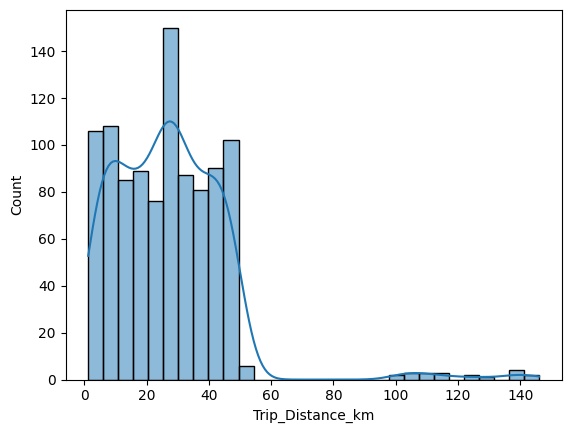

In [25]:
sns.histplot(df["Trip_Distance_km"],kde=True)

<Axes: >

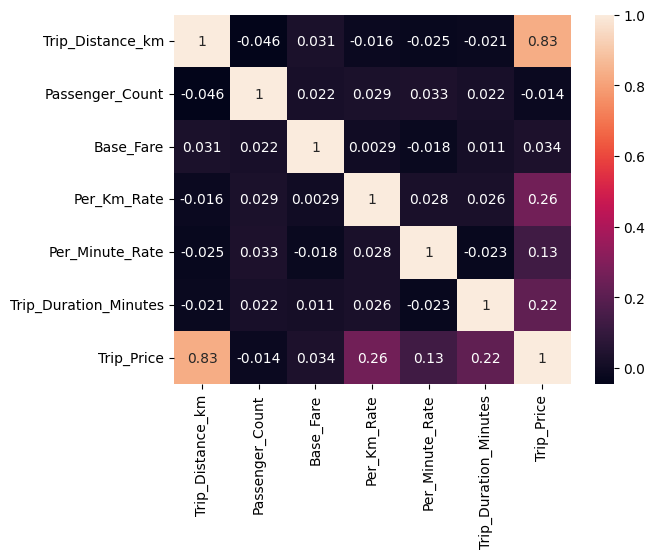

In [26]:
sns.heatmap(df.corr(numeric_only=True),annot=True,)

<Axes: xlabel='count', ylabel='Time_of_Day'>

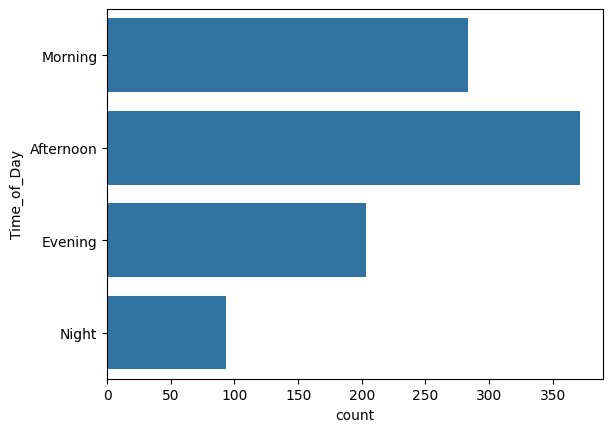

In [27]:
sns.countplot(df["Time_of_Day"])

<Axes: xlabel='count', ylabel='Day_of_Week'>

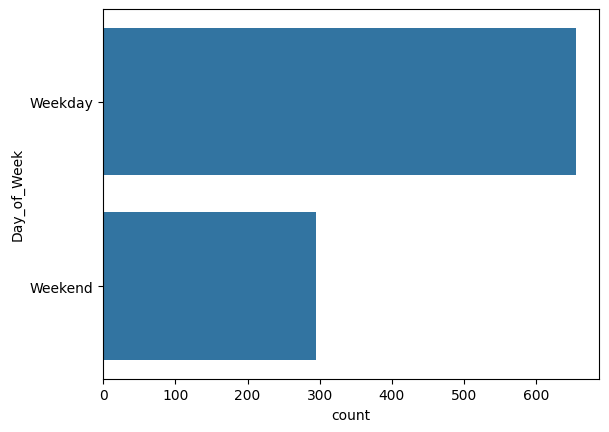

In [28]:
sns.countplot(df["Day_of_Week"])

<Axes: xlabel='count', ylabel='Traffic_Conditions'>

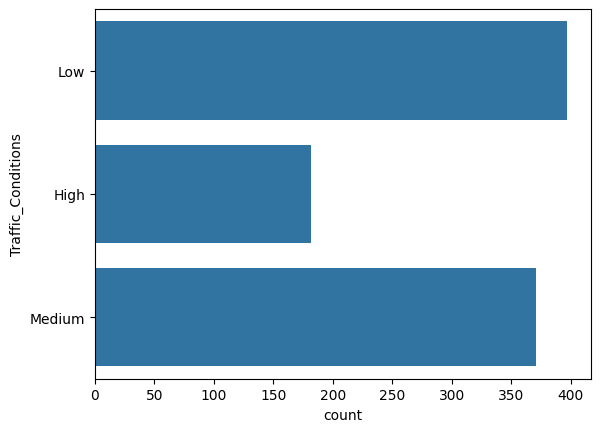

In [29]:
sns.countplot(df["Traffic_Conditions"])


<Axes: xlabel='count', ylabel='Weather'>

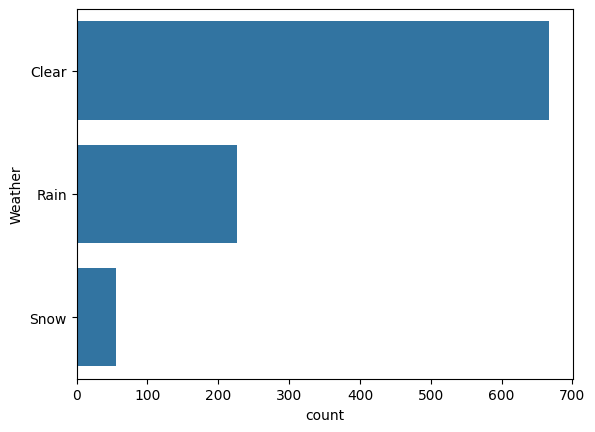

In [30]:
sns.countplot(df["Weather"])

<Axes: xlabel='Trip_Price', ylabel='Traffic_Conditions'>

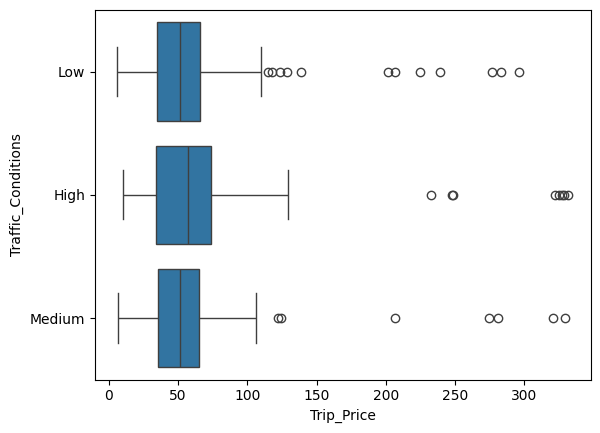

In [31]:
sns.boxplot(x=df['Trip_Price'],y=df['Traffic_Conditions'],data=df)

<Axes: xlabel='Trip_Price', ylabel='Weather'>

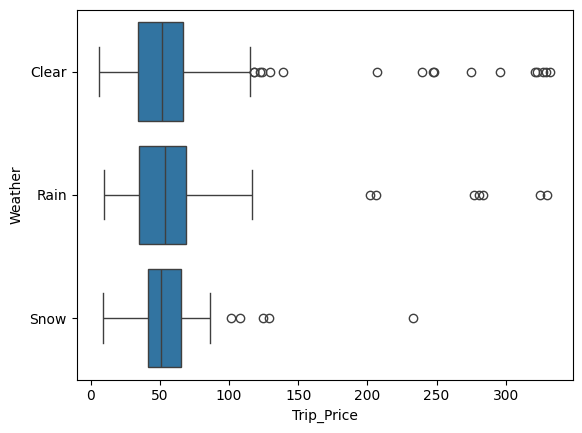

In [32]:
sns.boxplot(x=df['Trip_Price'],y=df['Weather'],data=df)

<Axes: xlabel='Trip_Price', ylabel='Day_of_Week'>

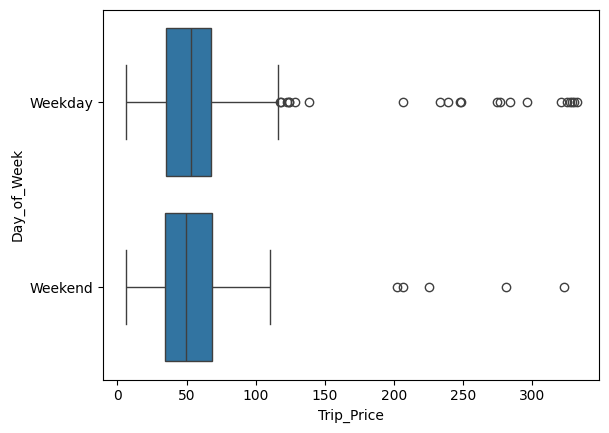

In [33]:
sns.boxplot(x=df['Trip_Price'],y=df['Day_of_Week'],data=df)

<Axes: xlabel='Trip_Price', ylabel='Time_of_Day'>

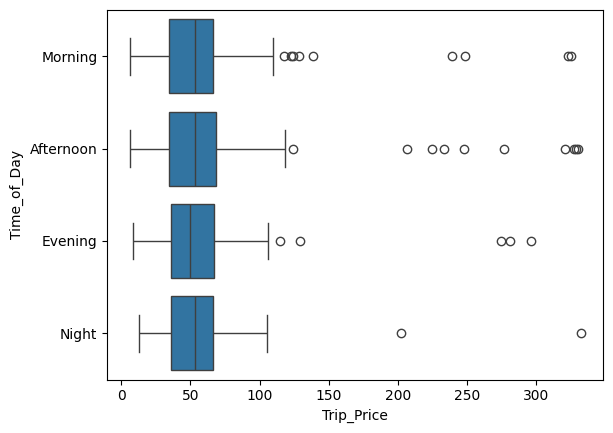

In [34]:
sns.boxplot(x=df['Trip_Price'],y=df['Time_of_Day'],data=df)

In [35]:
df.columns

Index(['Trip_Distance_km', 'Time_of_Day', 'Day_of_Week', 'Passenger_Count',
       'Traffic_Conditions', 'Weather', 'Base_Fare', 'Per_Km_Rate',
       'Per_Minute_Rate', 'Trip_Duration_Minutes', 'Trip_Price'],
      dtype='object')

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Trip_Distance_km       1000 non-null   float64
 1   Time_of_Day            950 non-null    object 
 2   Day_of_Week            950 non-null    object 
 3   Passenger_Count        1000 non-null   float64
 4   Traffic_Conditions     950 non-null    object 
 5   Weather                950 non-null    object 
 6   Base_Fare              1000 non-null   float64
 7   Per_Km_Rate            1000 non-null   float64
 8   Per_Minute_Rate        1000 non-null   float64
 9   Trip_Duration_Minutes  1000 non-null   float64
 10  Trip_Price             1000 non-null   float64
dtypes: float64(7), object(4)
memory usage: 86.1+ KB


In [37]:
df["Day_of_Week"]=df["Day_of_Week"].map({"Weekend":0,"Weekday":1})

In [38]:
df=pd.get_dummies(df,columns=['Time_of_Day','Traffic_Conditions','Weather'])

In [39]:
df

,Trip_Distance_km,Day_of_Week,Passenger_Count,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price,Time_of_Day_Afternoon,Time_of_Day_Evening,Time_of_Day_Morning,Time_of_Day_Night,Traffic_Conditions_High,Traffic_Conditions_Low,Traffic_Conditions_Medium,Weather_Clear,Weather_Rain,Weather_Snow
0,19.35,1.0,3.0,3.56,0.80,0.32,53.82,36.262400,False,False,True,False,False,True,False,True,False,False
1,47.59,1.0,1.0,3.50,0.62,0.43,40.57,56.874773,True,False,False,False,True,False,False,True,False,False
2,36.87,0.0,1.0,2.70,1.21,0.15,37.27,52.903200,False,True,False,False,True,False,False,True,False,False
3,30.33,1.0,4.0,3.48,0.51,0.15,116.81,36.469800,False,True,False,False,False,True,False,False,False,False
4,27.07,1.0,3.0,2.93,0.63,0.32,22.64,15.618000,False,True,False,False,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,5.49,0.0,4.0,2.39,0.62,0.49,58.39,34.404900,True,False,False,False,False,False,True,True,False,False
996,45.95,1.0,4.0,3.12,0.61,0.29,61.96,62.129500,False,False,False,True,False,False,True,True,False,False
997,7.70,1.0,3.0,2.08,1.78,0.29,54.18,33.123600,False,False,True,False,False,True,False,False,True,False
998,47.56,1.0,1.0,2.67,0.82,0.17,114.94,61.209000,False,False,True,False,False,True,False,True,False,False


In [40]:
df['Time_of_Day_Afternoon']=df['Time_of_Day_Afternoon'].astype(int)

In [41]:
df.head()

,Trip_Distance_km,Day_of_Week,Passenger_Count,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price,Time_of_Day_Afternoon,Time_of_Day_Evening,Time_of_Day_Morning,Time_of_Day_Night,Traffic_Conditions_High,Traffic_Conditions_Low,Traffic_Conditions_Medium,Weather_Clear,Weather_Rain,Weather_Snow
0,19.35,1.0,3.0,3.56,0.80,0.32,53.82,36.262400,0,False,True,False,False,True,False,True,False,False
1,47.59,1.0,1.0,3.50,0.62,0.43,40.57,56.874773,1,False,False,False,True,False,False,True,False,False
2,36.87,0.0,1.0,2.70,1.21,0.15,37.27,52.903200,0,True,False,False,True,False,False,True,False,False
3,30.33,1.0,4.0,3.48,0.51,0.15,116.81,36.469800,0,True,False,False,False,True,False,False,False,False
4,27.07,1.0,3.0,2.93,0.63,0.32,22.64,15.618000,0,True,False,False,True,False,False,True,False,False


In [42]:
df['Time_of_Day_Evening']=df['Time_of_Day_Evening'].astype(int)

In [43]:
df['Time_of_Day_Morning']=df['Time_of_Day_Morning'].astype(int)

In [44]:
df['Time_of_Day_Night']=df['Time_of_Day_Night'].astype(int)

In [45]:
df['Traffic_Conditions_High']=df['Traffic_Conditions_High'].astype(int)

In [46]:
df['Traffic_Conditions_Low']=df['Traffic_Conditions_Low'].astype(int)

In [47]:
df['Traffic_Conditions_Medium']=df['Traffic_Conditions_Medium'].astype(int)

In [48]:
df['Weather_Clear']=df['Weather_Clear'].astype(int)

In [49]:
df['Weather_Rain']=df['Weather_Rain'].astype(int)

In [50]:
df['Weather_Snow']=df['Weather_Snow'].astype(int)

In [51]:
df.head()

,Trip_Distance_km,Day_of_Week,Passenger_Count,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price,Time_of_Day_Afternoon,Time_of_Day_Evening,Time_of_Day_Morning,Time_of_Day_Night,Traffic_Conditions_High,Traffic_Conditions_Low,Traffic_Conditions_Medium,Weather_Clear,Weather_Rain,Weather_Snow
0,19.35,1.0,3.0,3.56,0.80,0.32,53.82,36.262400,0,0,1,0,0,1,0,1,0,0
1,47.59,1.0,1.0,3.50,0.62,0.43,40.57,56.874773,1,0,0,0,1,0,0,1,0,0
2,36.87,0.0,1.0,2.70,1.21,0.15,37.27,52.903200,0,1,0,0,1,0,0,1,0,0
3,30.33,1.0,4.0,3.48,0.51,0.15,116.81,36.469800,0,1,0,0,0,1,0,0,0,0
4,27.07,1.0,3.0,2.93,0.63,0.32,22.64,15.618000,0,1,0,0,1,0,0,1,0,0


<Axes: xlabel='Time_of_Day_Evening', ylabel='count'>

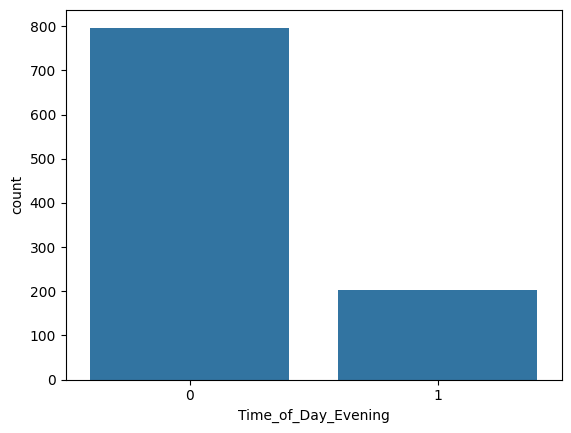

In [52]:
sns.countplot(x=df['Time_of_Day_Evening'])

<Axes: xlabel='Time_of_Day_Afternoon', ylabel='count'>

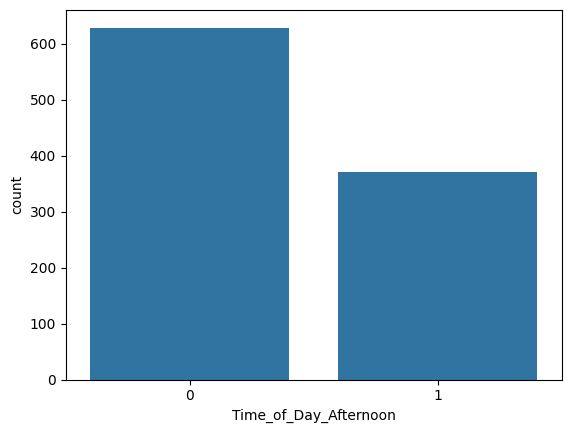

In [53]:
sns.countplot(x=df['Time_of_Day_Afternoon'])

<Axes: xlabel='Time_of_Day_Morning', ylabel='count'>

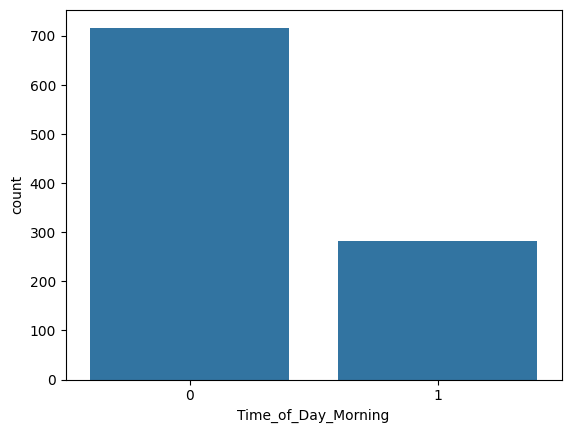

In [54]:
sns.countplot(x=df['Time_of_Day_Morning'])

<Axes: xlabel='Time_of_Day_Night', ylabel='count'>

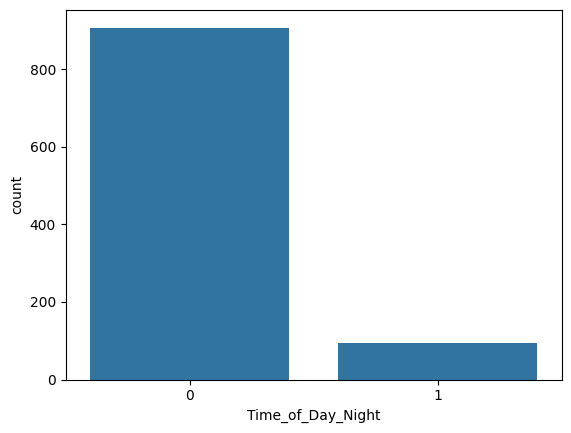

In [55]:
sns.countplot(x=df['Time_of_Day_Night'])

<Axes: xlabel='Weather_Snow', ylabel='count'>

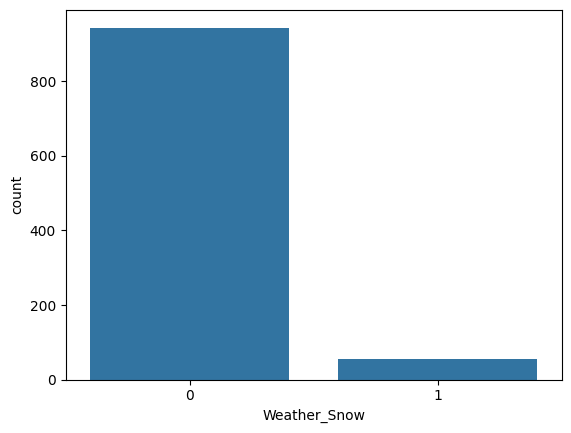

In [56]:
sns.countplot(x=df['Weather_Snow'])

<Axes: xlabel='Weather_Rain', ylabel='count'>

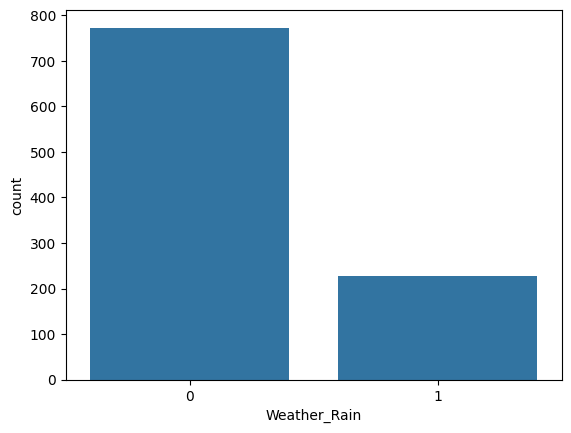

In [57]:
sns.countplot(x=df['Weather_Rain'])

<Axes: xlabel='Weather_Clear', ylabel='count'>

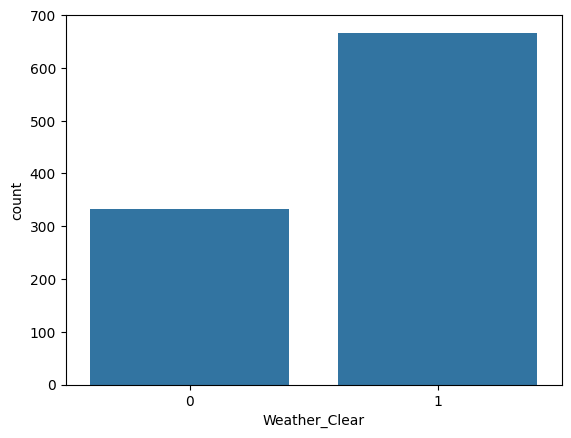

In [58]:
sns.countplot(x=df['Weather_Clear'])

<Axes: xlabel='Traffic_Conditions_High', ylabel='count'>

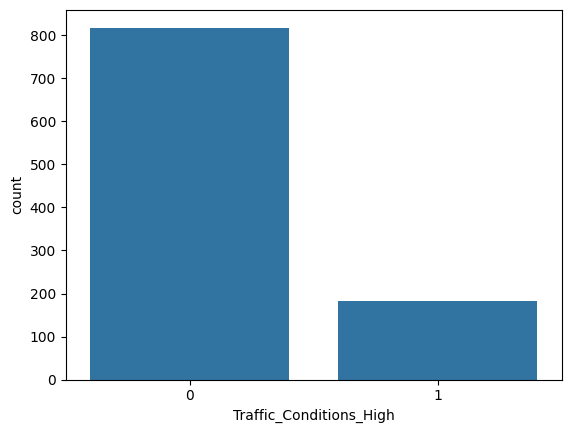

In [59]:
sns.countplot(x=df['Traffic_Conditions_High'])

<Axes: xlabel='Traffic_Conditions_Low', ylabel='count'>

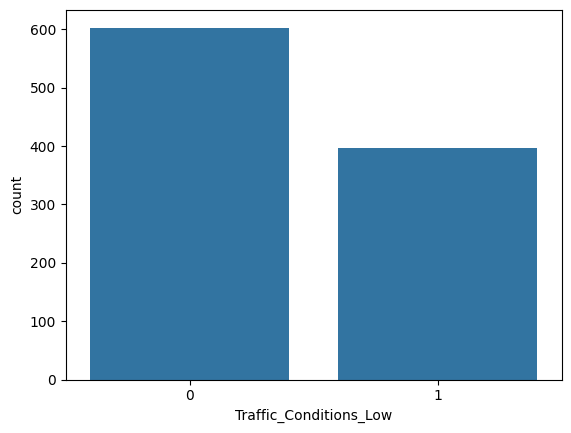

In [60]:
sns.countplot(x=df['Traffic_Conditions_Low'])

<Axes: xlabel='Traffic_Conditions_Medium', ylabel='count'>

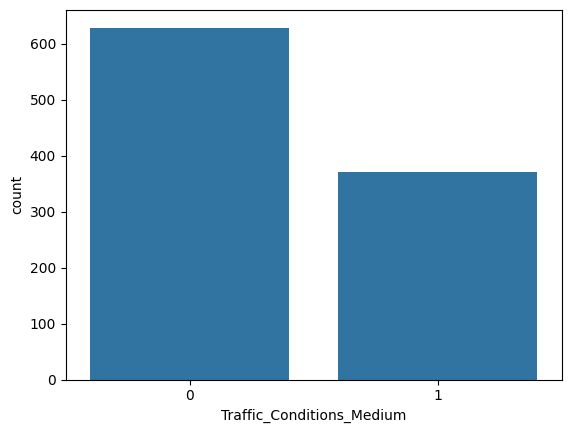

In [61]:
sns.countplot(x=df['Traffic_Conditions_Medium'])

<Axes: xlabel='Day_of_Week', ylabel='count'>

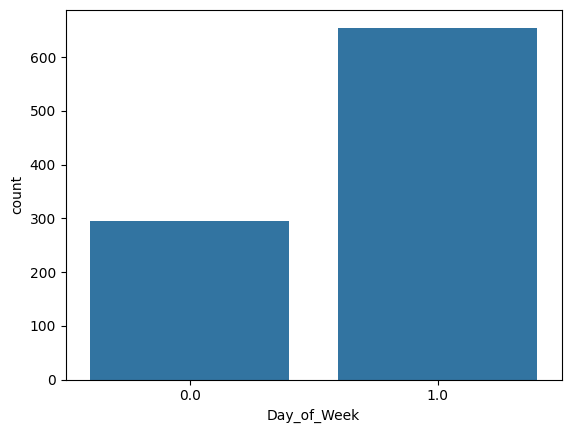

In [62]:
sns.countplot(x=df['Day_of_Week'])

In [63]:
df

,Trip_Distance_km,Day_of_Week,Passenger_Count,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price,Time_of_Day_Afternoon,Time_of_Day_Evening,Time_of_Day_Morning,Time_of_Day_Night,Traffic_Conditions_High,Traffic_Conditions_Low,Traffic_Conditions_Medium,Weather_Clear,Weather_Rain,Weather_Snow
0,19.35,1.0,3.0,3.56,0.80,0.32,53.82,36.262400,0,0,1,0,0,1,0,1,0,0
1,47.59,1.0,1.0,3.50,0.62,0.43,40.57,56.874773,1,0,0,0,1,0,0,1,0,0
2,36.87,0.0,1.0,2.70,1.21,0.15,37.27,52.903200,0,1,0,0,1,0,0,1,0,0
3,30.33,1.0,4.0,3.48,0.51,0.15,116.81,36.469800,0,1,0,0,0,1,0,0,0,0
4,27.07,1.0,3.0,2.93,0.63,0.32,22.64,15.618000,0,1,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,5.49,0.0,4.0,2.39,0.62,0.49,58.39,34.404900,1,0,0,0,0,0,1,1,0,0
996,45.95,1.0,4.0,3.12,0.61,0.29,61.96,62.129500,0,0,0,1,0,0,1,1,0,0
997,7.70,1.0,3.0,2.08,1.78,0.29,54.18,33.123600,0,0,1,0,0,1,0,0,1,0
998,47.56,1.0,1.0,2.67,0.82,0.17,114.94,61.209000,0,0,1,0,0,1,0,1,0,0


In [64]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor

In [65]:
x=df.drop(['Trip_Price','Time_of_Day_Morning','Time_of_Day_Night','Traffic_Conditions_High','Weather_Snow','Passenger_Count','Day_of_Week','Base_Fare','Weather_Rain'],axis=1)
y=df['Trip_Price']

In [66]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33, random_state=42)

In [67]:
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.fit_transform(x_test)

In [68]:
models= {
    'LinearRegression':LinearRegression(),
    'knn':KNeighborsRegressor(),
    'DecisionTreeRegressor':DecisionTreeRegressor(),
    'svm':SVR(),
    'randomforest':RandomForestRegressor(),
    'gradientboost':GradientBoostingRegressor(),
    'adaboost':AdaBoostRegressor()


}

In [69]:
result=[]

In [70]:
for name,model in models.items():
    model.fit(x_train_scaled,y_train)
    y_pred=model.predict(x_test_scaled)
    r2= r2_score(y_test,y_pred)
    n=x_test.shape[0]
    p=x_test.shape[1]
    adjusted_r2=1-((1-r2)*(n-1)/(n-p-1))
    adjusted_r2
    result.append({
        'model':name,
        'r2_score':r2,
        'adjusted_r2':adjusted_r2

    })

In [71]:
result

[{'model': 'LinearRegression',
  'r2_score': 0.7874638762307176,
  'adjusted_r2': 0.7814862977497065},
 {'model': 'knn',
  'r2_score': 0.8281016907544921,
  'adjusted_r2': 0.8232670508069622},
 {'model': 'DecisionTreeRegressor',
  'r2_score': 0.8621904937080985,
  'adjusted_r2': 0.8583146013436388},
 {'model': 'svm',
  'r2_score': 0.2622270187714808,
  'adjusted_r2': 0.24147715367442868},
 {'model': 'randomforest',
  'r2_score': 0.9316967594940273,
  'adjusted_r2': 0.9297757308547968},
 {'model': 'gradientboost',
  'r2_score': 0.9119245684588516,
  'adjusted_r2': 0.9094474469467568},
 {'model': 'adaboost',
  'r2_score': 0.8449704473975919,
  'adjusted_r2': 0.8406102412306491}]